### Analysis of factors that affect student's quality of academic performance

1- Age
2- Gender
3 - Geographical belongingness
4 - Ethnicity
5 - Marital status
6 - socioeconomic status (SES)
7 - parents’ education level
8 - parental profession
9 - language
10 - income
11 - religious affiliations


# Importação das bibliotecas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import dask.dataframe as dd
from utils import load_parquets, info_sum_isna
from scipy.stats import ranksums
from scipy import stats

# Carregando os dados

### Dataset information:



In [8]:
year = 2020
path = f'../datasets/integrated_datas_{year}.parquet.gzip'
data = dd.read_parquet(path, ignore_metadata_file=True)

<!-- Testing normal distribution for grades for all Brazilian states to decide which statistical test would be suitable -->

In [9]:
# def ploting_distribution_female_male_per_state(state, course):
#     dataset_women = mulher_2020[mulher_2020['SG_UF_RESIDENCIA'] == state]
#     dataset_man = homem_2020[homem_2020['SG_UF_RESIDENCIA'] == state]
#     fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
#     ax1 = sns.histplot(dataset_women[course], ax=ax1).set(title="Math grades distribution 'W'", xlabel='Math grades W', ylabel='density')
#     ax2 = sns.histplot(dataset_man[course], ax=ax2).set(title="Math grades distribution 'M'",  xlabel='Math grades M', ylabel='density')
#     plt.show()

## Testes estatisticos para 3 variavies

### 1. SES Income

In [10]:
data['TP_SES_INCOME'].value_counts().compute()

E    2074904
D     416151
C      37866
A      31582
B        801
Name: TP_SES_INCOME, dtype: int64

In [11]:
# def replace_ethnicity(value):
#     if value == 'A':
#         return "White"
#     elif value == 'B':
#         return "Black"
#     elif value == 3:
#         return "Brown"
#     elif value == 4:
#         return "Yellow"
#     elif value == 5:
#         return "Indigenous"

In [12]:
# data['TP_COR_RACA'] = data.TP_COR_RACA.apply(replace_ethnicity)

In [13]:
# data['TP_COR_RACA'].value_counts().compute()

In [14]:
# def replace_ethnicity(value):
#     if value == 1:
#         return "White"
#     elif value == 2:
#         return "Black"
#     elif value == 3:
#         return "Brown"
#     elif value == 4:
#         return "Yellow"
#     elif value == 5:
#         return "Indigenous"

# data['TP_COR_RACA'] = data.TP_COR_RACA.apply(replace_ethnicity)

In [15]:
a_class = data[(data['TP_SES_INCOME'] == 'A')]
b_class = data[(data['TP_SES_INCOME'] == 'B')]
c_class = data[(data['TP_SES_INCOME'] == 'C')]
d_class = data[(data['TP_SES_INCOME'] == 'D')]
e_class = data[(data['TP_SES_INCOME'] == 'E')]

In [16]:
def has_normal_distribution(dataset, course):
    k2, p = stats.normaltest(dataset[course])
    alpha = 0.05
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        # print("The null hypothesis can be rejected")
        return False
    else:
        print("The null hypothesis cannot be rejected")
        return True

In [17]:
states = list(data['SG_UF_RESIDENCIA'].unique())

In [18]:
has_normal_distribution(a_class[a_class['SG_UF_RESIDENCIA'] == 'PB'], 'NU_NOTA_MT')

p = 0.0577153
The null hypothesis cannot be rejected


True

In [19]:
def testing_normal_distribution_all_states(course):
    number_of_normal_distributions = 0
    for state in states:
        a_class_state = a_class[a_class['SG_UF_RESIDENCIA'] == state]
        b_class_state = b_class[b_class['SG_UF_RESIDENCIA'] == state]
        c_class_state = c_class[c_class['SG_UF_RESIDENCIA'] == state]
        d_class_state = d_class[d_class['SG_UF_RESIDENCIA'] == state]
        e_class_state = e_class[e_class['SG_UF_RESIDENCIA'] == state]

        result_a_class_dist = has_normal_distribution(a_class_state, 'NU_NOTA_MT')
        result_b_class_dist = has_normal_distribution(b_class_state, 'NU_NOTA_MT')
        result_c_class_dist = has_normal_distribution(c_class_state, 'NU_NOTA_MT')
        result_d_class_dist = has_normal_distribution(d_class_state, 'NU_NOTA_MT')
        result_e_class_dist = has_normal_distribution(e_class_state, 'NU_NOTA_MT')

        if (result_a_class_dist | result_b_class_dist | result_c_class_dist | result_d_class_dist | result_e_class_dist):
            print(state)
            number_of_normal_distributions+= 1
            print('normal distribution')
    return number_of_normal_distributions


In [20]:
testing_normal_distribution_all_states('NU_NOTA_MT')

p = 8.34743e-07
p = 0.72056
The null hypothesis cannot be rejected
p = 3.93135e-08
p = 7.5388e-23
p = 0
RS
normal distribution
p = 0.0577153
The null hypothesis cannot be rejected


/Users/chrystinne/.pyenv/versions/3.9.4/envs/venem/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


p = 0.778779
The null hypothesis cannot be rejected
p = 0.0589997
The null hypothesis cannot be rejected
p = 7.97473e-16
p = 0
PB
normal distribution
p = 2.58769e-06
p = 0.75626
The null hypothesis cannot be rejected
p = 3.86236e-05
p = 1.56172e-69
p = 0
BA
normal distribution
p = 0.0262321


ValueError: skewtest is not valid with less than 8 samples; 5 samples were given.

In [ ]:
def perform_Kruskal_Wallis_per_state(state, course):
   teste = stats.kruskal(a_class[a_class['SG_UF_RESIDENCIA'] == state][course], b_class[b_class['SG_UF_RESIDENCIA'] == state][course], c_class[c_class['SG_UF_RESIDENCIA'] == state][course], d_class[d_class['SG_UF_RESIDENCIA'] == state][course], e_class[e_class['SG_UF_RESIDENCIA'] == state][course])
   return teste

In [ ]:
print(perform_Kruskal_Wallis_per_state('PB', 'NU_NOTA_MT'))

KruskalResult(statistic=1869.501424945442, pvalue=0.0)


In [ ]:
print(perform_Kruskal_Wallis_per_state('RN', 'NU_NOTA_LC'))

KruskalResult(statistic=1469.7565609248295, pvalue=0.0)


In [ ]:
print(perform_Kruskal_Wallis_per_state('PB', 'NU_NOTA_CN'))

KruskalResult(statistic=1825.7341778511773, pvalue=0.0)


Interpreting the results:

The Kruskal-Wallis Test uses the following null and alternative hypotheses:

The null hypothesis (H0): The median score in math is equal across all ethnicty groups.

The alternative hypothesis: (Ha): The median score in math is not equal across all ethnicty groups.

In this case, the test statistic is 7749.868515864906 and the corresponding p-value is 0.0. Since this p-value is less than 0.05, we can reject the null hypothesis that the median score in math is the same for all five ethnicity groups. We have sufficient evidence to conclude that the ethnicity leads to statistically significant differences in median scores in math for the ENEM exam.

In [ ]:
def ploting_distribution_ses_income_per_state(state, course):
    a_class_state = a_class[a_class['SG_UF_RESIDENCIA'] == state]
    b_class_state = b_class[b_class['SG_UF_RESIDENCIA'] == state]
    c_class_state = c_class[c_class['SG_UF_RESIDENCIA'] == state]
    d_class_state = d_class[d_class['SG_UF_RESIDENCIA'] == state]
    e_class_state = e_class[e_class['SG_UF_RESIDENCIA'] == state]

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, sharey=True)
    ax1 = sns.histplot(a_class_state[course], ax=ax1).set(title="A class", xlabel='A class', ylabel='density')
    ax2 = sns.histplot(b_class_state[course], ax=ax2).set(title="B class",  xlabel='B class', ylabel='density')
    ax3 = sns.histplot(c_class_state[course], ax=ax3).set(title="C class", xlabel='C class', ylabel='density')
    ax4 = sns.histplot(d_class_state[course], ax=ax4).set(title="D class",  xlabel='D class', ylabel='density')
    ax5 = sns.histplot(e_class_state[course], ax=ax5).set(title="E class",  xlabel='E class', ylabel='density')
    plt.show()

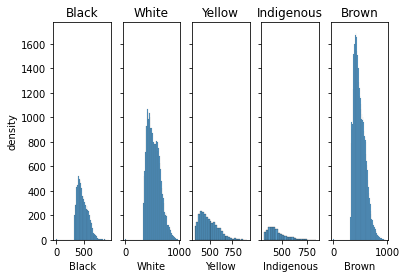

In [ ]:
ploting_distribution_ses_income_per_state('PB', 'NU_NOTA_MT')